In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from Simulate import *
sim = Simulator()

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
sim.detector.reset()

In [3]:
a = 0.6
v = 0.02
position = a*(2.*np.random.random(2)-[1.,1.])
velocity = v*(2.*np.random.random(2)-[1.,1.])

position = [0.,0.]
velocity = [0.05,0.001]

pt=np.linalg.norm(velocity)
phi=np.arctan2(velocity[1],velocity[0])
xVtx=position[0]
yVtx=position[1]

simtrack1=sim.propagate_direct([0.5,0.5],[2.,0.1],id=0)
simtrack2=sim.propagate_direct([0.2,0.2],[-0.1,2], id=1)
simtrack3=sim.propagate_direct([0.,0.],[-1,.1], id=2)
simtrack4=sim.propagate_direct([0.,0.],[0.1,-0.5], id=3)

hits=sim.detector.getHits()

Simulate.py:154: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  self.history=self.history.sort(['particle','layer','hit'])


In [4]:
x=hits['x'].values
y=hits['y'].values
x
y


array([ 0.50909937,  0.57238118,  0.57735297,  0.64876309,  0.76058145,
        0.69868836,  0.72918795,  0.70730829,  0.72926275,  0.83052642,
        0.90293906,  1.03837399,  0.81972678,  1.24589625,  1.66650744,
        2.07913975,  2.48331133,  2.89761706,  3.30007886,  3.70529394,
        4.1201656 ,  4.5415765 ,  4.96251775,  5.39230596,  0.01413649,
       -0.00628316, -0.02408471, -0.01047193,  0.03926829,  0.07696009,
        0.11098243,  0.16488044,  0.09947432,  0.0374369 , -0.14449314,
       -0.35370093, -0.77953669, -1.05032991, -1.21135744, -1.25923391,
       -1.14894965, -0.40007315,  0.67185536,  1.97741907])

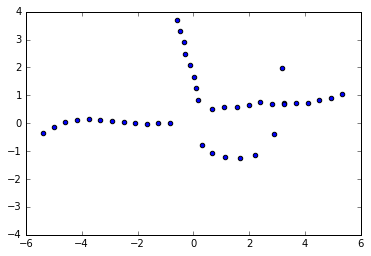

In [5]:
plt.scatter(x,y)
plt.axis('equal')

axes = plt.gca()
axes.set_xlim([-6,6])
axes.set_ylim([-6,6])

plt.show()

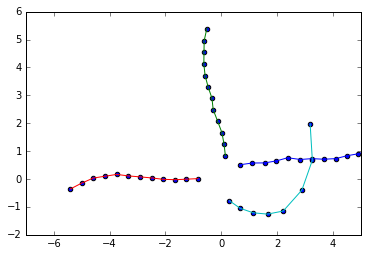

In [6]:
plt.plot(simtrack1['x'].values,simtrack1['y'].values)
plt.plot(simtrack2['x'].values,simtrack2['y'].values)
plt.plot(simtrack3['x'].values,simtrack3['y'].values)
plt.plot(simtrack4['x'].values,simtrack4['y'].values)

plt.scatter(x,y)
plt.axis('equal')

axes = plt.gca()
#axes.set_xlim([-2,2])
#axes.set_ylim([-2,2])

plt.show()

In [7]:
simtrack1['x']

0     0.659621
1     1.111102
2     1.563429
3     1.979484
4     2.381272
5     2.831501
6     3.252454
7     3.682566
8     4.102093
9     4.507013
10    4.917270
11    5.316051
Name: x, dtype: float64

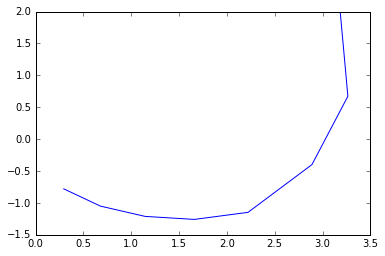

In [8]:
sim.plot()

In [9]:
sim.detector.cells_r

array([ 0.83333333,  1.25      ,  1.66666667,  2.08333333,  2.5       ,
        2.91666667,  3.33333333,  3.75      ,  4.16666667,  4.58333333,
        5.        ,  5.41666667])

In [10]:
from Fitting import *

In [11]:
particle_df = hits.loc[hits['particle']==0]

In [12]:
x=particle_df['x'].values
y=particle_df['y'].values

In [13]:
fitter = TrackFitter(B=1.)

In [14]:
x,y

(array([ 0.6597441 ,  1.11125145,  1.56347092,  1.97974348,  2.38149446,
         2.83174487,  3.25259835,  3.68269127,  4.10235139,  4.50745719,
         4.91779433,  5.31620703]),
 array([ 0.50909937,  0.57238118,  0.57735297,  0.64876309,  0.76058145,
         0.69868836,  0.72918795,  0.70730829,  0.72926275,  0.83052642,
         0.90293906,  1.03837399]))

In [15]:
fitter.fit(x,y)

TypeError: fit() takes exactly 2 arguments (3 given)

In [ ]:
def circular_path(x, r, vx, vy):
    return r - np.sqrt(r**2-(x-vx)**2) + vy


def rotateArray(x, y, phi):
    c, s = np.cos(phi), np.sin(phi)
    xr=c*x-s*y
    yr=s*x+c*y

    return xr,yr


def rotateToQuadrant(x,y):
    seedx=x[1]-x[0]
    seedy=y[1]-y[0]
    phi0=np.arctan2(y[0],x[0])
    phi1=np.arctan2(seedy,seedx)
    phi=phi1
    xr,yr=rotateArray(x,y,-phi)
    return xr,yr,phi

def fit(x,y):
    xr,yr,phi=rotateToQuadrant(x,y);
    p, cov = curve_fit(circular_path, xr, yr,
                       p0=[200.,0.,0.],
                       bounds=([5.,-25.,-25.],
                               [1000., 25, 25]
                               )
                       )

    r = p[0]
    pt = r
    vx = p[1]
    vy = p[2]
    chg = 1
    return  pt,phi,vx,vy,chg





In [ ]:
fit(x,y)

In [ ]:
aa=[]
aa+=[2]
aa+=[3]
aa